In [6]:
from Brands import Sonites
from Analyzer import Analyzer
from Solver import Solver
import numpy as np

son = Sonites()
print("----")
an = Analyzer()
print("----")
solver = Solver()



./Exports/TeamExport_A46051_Alpha_M_Period 3.xlsx loaded
----
No weights provided
before
./Exports/TeamExport_A46051_Alpha_M_Period 3.xlsx loaded
after
./Exports/TeamExport_A46051_Alpha_M_Period 3.xlsx loaded
----
Attributes file:./Attributes/attributes_3.json


In [7]:
df_seg_sem_fc = an.forecast_df(dataframe=son.df_segments_semantic, steps=2)
target_sem = df_seg_sem_fc[(df_seg_sem_fc["Segment"]=="Explorers")&(df_seg_sem_fc["Period"]==5)][['# Features', 'Design Index', 'Battery Life', 'Display Size', 'Proc. Power', 'Price']].values
target_sem

array([[4.489999999999991, 2.7399999999999896, 5.42999999999998,
        5.489999999999952, 5.909999999999947, 4.39999999999999]],
      dtype=object)

In [8]:
df_seg_mds_fc = an.forecast_df(dataframe=son.df_segments_mds, steps=2)
target_mds = df_seg_mds_fc[(df_seg_mds_fc["Segment"]=="Explorers")&(df_seg_mds_fc["Period"]==5)][['Economy', 'Performance', 'Convenience']].values
target_mds


array([[-2.9, 12.199999999999974, -3.8200000000000056]], dtype=object)

In [9]:
optimum = solver.find_optimum(ideal_semantic=target_sem, ideal_mds=target_mds, semantic_weights=son.rel_importance_features, 
                              mds_weights=[1/3,1/3,1/3], error_weights=np.array([2,1]))

Optimal Features: [ 13.77710432   5.40882123  75.1300413   31.43472077  90.23523852
 360.64020425]
Minimum Combined Error: 0.051014300772855625


In [10]:
sem_solved  = solver.regress_semantic(optimum[0])
sem_solved

[4.490000076373069,
 2.7400000420058483,
 5.429999944789575,
 5.4899999883400765,
 5.910000083393205,
 4.399999983066421]

In [11]:
target_sem

array([[4.489999999999991, 2.7399999999999896, 5.42999999999998,
        5.489999999999952, 5.909999999999947, 4.39999999999999]],
      dtype=object)

In [12]:
from Utils import relevance_score

relevance_score(sem_solved, target_sem, max_distance_1D=6, weights=an.rel_importance_features)

0.9999999917085788

In [13]:
mds_solved = solver.regress_mds(optimum[0])
mds_solved

[-4.77760782791956, 7.66381225612333, -5.821033071964067]

In [14]:
target_mds

array([[-2.9, 12.199999999999974, -3.8200000000000056]], dtype=object)

In [15]:
relevance_score(mds_solved, target_mds, max_distance_1D=40, weights=[1/3, 1/3, 1/3])

0.923478565423559

In [16]:
from DataLoader import DataLoader

dl = DataLoader()

df = dl.load_all_sonites()


./Exports/TeamExport_A46051_Alpha_M_Period 3.xlsx loaded


In [17]:
df = df.astype(float)

df

,Explorers,Shoppers,Professionals,High Earners,Savers,Economy,Performance,Convenience,# Features_1,Design Index_1,...,Display Size_1,Proc. Power_1,Rec. retail price,Base Cost,# Features_1,Design Index_1,Battery Life_1,Display Size_1,Proc. Power_1,Price
MARKET : Sonites,,,,,,,,,,,,,,,,,,,,,
MOST,170.0,170.0,170.0,170.0,1280.0,11.52,-16.48,-9.92,8.0,5.0,...,8.0,10.0,215.0,47.0,2.11,2.34,3.31,1.71,1.50,2.27
MOVE,1560.0,240.0,240.0,240.0,240.0,-4.72,3.84,-3.90,13.0,6.0,...,31.0,83.0,350.0,158.0,4.26,2.58,5.93,4.56,4.58,4.71
ROBUDO,290.0,1810.0,290.0,290.0,680.0,7.18,-2.72,0.18,8.0,7.0,...,23.0,37.0,280.0,93.0,2.11,4.77,2.39,4.22,3.32,2.92
ROCK,410.0,240.0,1280.0,640.0,240.0,-10.60,11.06,13.80,15.0,9.0,...,33.0,86.0,440.0,172.0,4.97,6.37,5.57,5.93,5.54,5.59
ROLLED,670.0,340.0,340.0,2120.0,340.0,-10.88,3.86,9.80,11.0,9.0,...,23.0,65.0,450.0,135.0,3.30,6.37,3.40,4.22,4.74,5.63
SOFT,310.0,520.0,310.0,310.0,620.0,11.48,-16.32,-13.48,7.0,4.0,...,8.0,15.0,225.0,63.0,1.73,1.63,3.31,1.61,1.53,2.28
SOLO,420.0,570.0,360.0,360.0,360.0,-2.28,-9.38,-5.10,7.0,6.0,...,11.0,38.0,340.0,109.0,1.73,3.23,4.00,2.07,2.82,4.34
TONE,600.0,320.0,330.0,770.0,490.0,-11.90,8.08,16.36,16.0,10.0,...,24.0,76.0,475.0,237.0,5.32,6.50,5.12,4.52,5.51,5.78
TONYO,320.0,520.0,1620.0,270.0,270.0,-12.14,12.26,-9.40,12.0,5.0,...,20.0,100.0,460.0,159.0,3.74,2.34,2.88,3.59,6.50,5.82


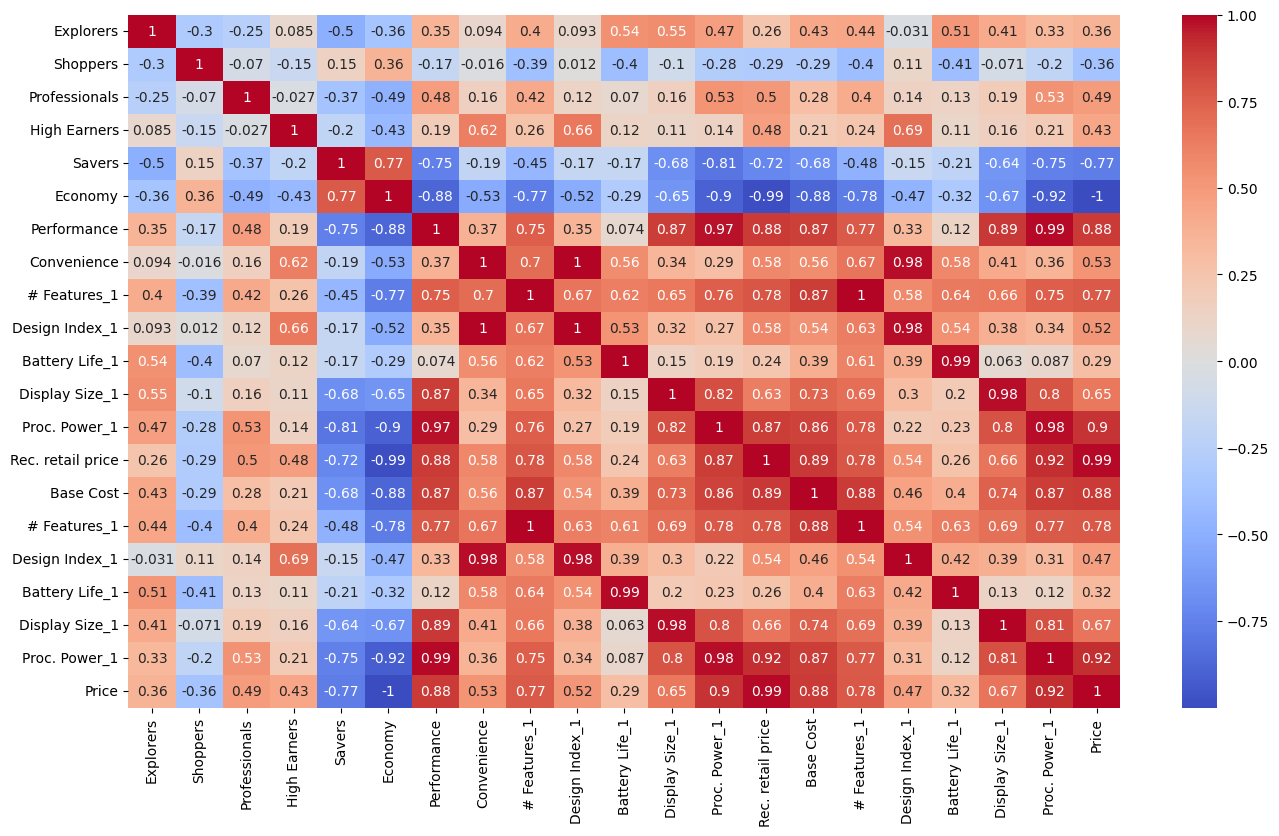

In [19]:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(16, 9))   # Optional: Specify the size of the figure
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')  # 'annot=True' will display the data values in each cell
plt.show()


In [28]:
df_corr = df.corr()
np.sum((np.abs(df_corr.values)>0.8)*1)/2


45.5

In [ ]:
dl.xlsx_path.split(sep=" ")[1][0]

'3'